<a href="https://github.com/Artem418k">Дерикон Артем</a>, 2024

#### <h1 align="center">Лабораторна робота №7. Методи кластеризації (навчання без учителя)
</h1>

<h2> Завдання для самостійної роботи </h2>

<ol>
   <b> <li>1.Реалізувати всі алгоритми кластеризації, наведені в роботі, для свого варіанта, обгрунтувавши знаення відповідних параметрів.</li>

</ol>
<h2>Алгоритм K-середніх</h2> 

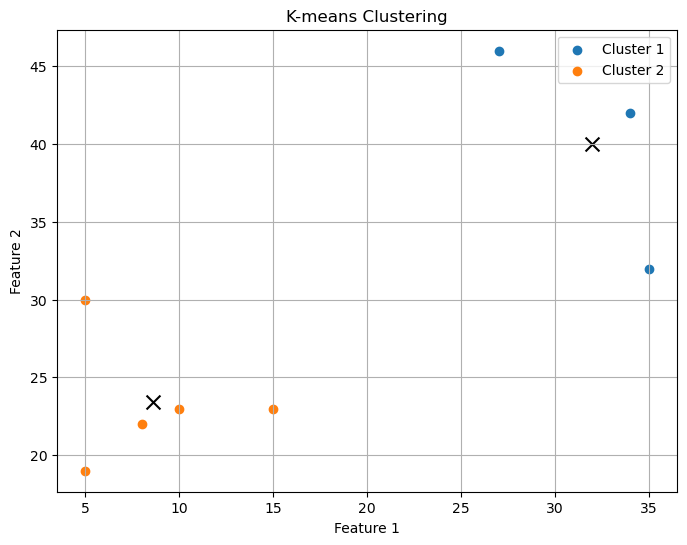

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Ваши дані
x_train_5 = np.array([[27, 46], [8, 22], [5, 30], [5, 19], [15, 23], [34, 42], [10, 23], [35, 32]])
y_train_5 = np.array([-1, -1, 1, -1, 1, 1, -1, -1])

# Адаптація даних до формату алгоритму
x = x_train_5

# Визначення кількості кластерів
K = len(np.unique(y_train_5))

# Ініціалізація центрів кластерів
means = [np.random.choice(x.flatten(), size=(2,)) for _ in range(K)]

n_iterations = 10
for n in range(n_iterations):
    clusters = [[] for _ in range(K)]
    
    # Призначення кожного спостереження до найближчого центру кластера
    for point in x:
        distances = [np.linalg.norm(point - mean) for mean in means]
        closest_cluster = np.argmin(distances)
        clusters[closest_cluster].append(point)
    
    # Перерахунок центрів кластерів
    means = [np.mean(cluster, axis=0) for cluster in clusters]

plt.figure(figsize=(8, 6))

# Відображення кластерів
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i+1}')

# Відображення центрів кластерів
for i, mean in enumerate(means):
    plt.scatter(mean[0], mean[1], marker='x', color='black', s=100)

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

<h2>Алгоритм DBSCAN</h2> 

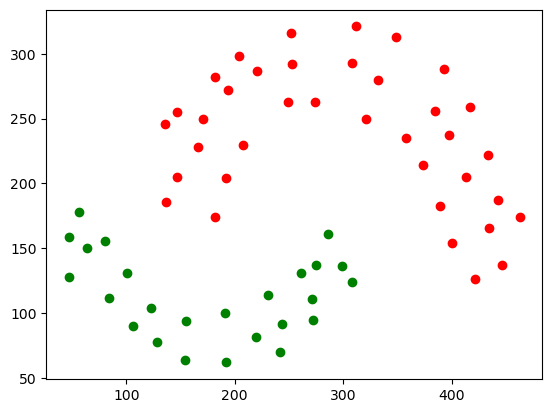

In [24]:
from itertools import cycle
from math import hypot
import matplotlib.pyplot as plt

def dbscan_naive(P, eps, m, distance):
    NOISE = 0
    C = 0

    visited_points = set()
    clustered_points = set()
    clusters = {NOISE: []}

    def region_query(p):
        return [q for q in P if distance(p, q) < eps]

    def expand_cluster(p, neighbours):
        if C not in clusters:
            clusters[C] = []
        clusters[C].append(p)
        clustered_points.add(p)
        while neighbours:
            q = neighbours.pop()
            if q not in visited_points:
                visited_points.add(q)
                neighbourz = region_query(q)
                if len(neighbourz) >= m:
                    neighbours.extend(neighbourz)
            if q not in clustered_points:
                clustered_points.add(q)
                clusters[C].append(q)
                if q in clusters[NOISE]:
                    clusters[NOISE].remove(q)

    for p in P:
        if p in visited_points:
            continue
        visited_points.add(p)
        neighbours = region_query(p)
        if len(neighbours) < m:
            clusters[NOISE].append(p)
        else:
            C += 1
            expand_cluster(p, neighbours)

    return clusters

P = [(64, 150), (84, 112), (106, 90), (154, 64), (192, 62), (220, 82), (244, 92), (271, 111), (275, 137), (286, 161), (56, 178), (80, 156), (101, 131), (123, 104), (155, 94), (191, 100), (242, 70), (231, 114), (272, 95), (261, 131), (299, 136), (308, 124), (128, 78), (47, 128), (47, 159), (137, 186), (166, 228), (171, 250), (194, 272), (221, 287), (253, 292), (308, 293), (332, 280), (385, 256), (398, 237), (413, 205), (435, 166), (447, 137), (422, 126), (400, 154), (389, 183), (374, 214), (358, 235), (321, 250), (274, 263), (249, 263), (208, 230), (192, 204), (182, 174), (147, 205), (136, 246), (147, 255), (182, 282), (204, 298), (252, 316), (312, 321), (349, 313), (393, 288), (417, 259), (434, 222), (443, 187), (463, 174)]

# Розмір епсилон-околу
eps = 60    
# Мінімальна кількість об'єктів для повного епсилон-околу
m = 5       

clusters = dbscan_naive(P, eps, m, lambda x, y: hypot(x[0] - y[0], x[1] - y[1]))
for c, points in zip(cycle('bgrcmykgrcmykgrcmykgrcmykgrcmykgrcmyk'), clusters.values()):
    X = [p[0] for p in points]
    Y = [p[1] for p in points]
    plt.scatter(X, Y, c=c)
plt.show()


<h2>Алгоритм K-середніх</h2> 

In [25]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters=3, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        # Ініціалізуємо центри кластерів випадковим чином
        centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iters):
            # Обчислюємо відстані між кожним зразком і центрами кластерів
            distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2).sum(axis=2))

            # Визначаємо найближчий центр кластера для кожного зразка
            labels = np.argmin(distances, axis=0)

            # Оновлюємо центри кластерів
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])

            # Якщо центри кластерів не змінились, завершуємо процес навчання
            if np.all(centroids == new_centroids):
                break

            centroids = new_centroids

        self.labels_ = labels
        self.cluster_centers_ = centroids

# Ваші дані
x_train_5 = np.array([[27, 46], [8, 22], [5, 30], [5, 19], [15, 23], [34, 42], [10, 23], [35, 32]])

# Ініціалізуємо та навчаємо модель KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_train_5)

# Отримуємо мітки кластерів та центри кластерів
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Виводимо результати
print("Cluster Labels:", cluster_labels)
print("Cluster Centers:", centroids)


Cluster Labels: [1 0 0 0 0 1 0 1]
Cluster Centers: [[ 8.6 23.4]
 [32.  40. ]]
